Μπεκιάρης Χαράλαμπος

Σχολή ΕΜΦΕ, ΕΜΠ

6ο εξάμηνο

Α.Μ.: ge18088
    
## Παραδοτέο 1


Αντιγράφουμε τον κώδικα του τέννις από το προηγούμενο εργαστήριο.

In [1]:
import random
random.seed(2018)  # for reproducibility
from simple_markov_chain_lib import markov_chain

p = 0.6

# A dictionary for the initial distibution. 
# We prescribe the initial distribution
init_probs = {"0-0": 1.0} 

Θα βάλουμε σε μία συνάρτηση την προσμοίωση ώστε να είναι ευκολότερο να την τρέχουμε για διαφορετικές τιμές του p.

In [2]:
def simulate(mc,N):
    r = 0
    for j in range(N):
        mc.start() # Start a new Chain
        while True: # Move the chain until player A or B is the winner
            mc.move()
            if mc.running_state == "GameA":
                r += 1 # Increase the success number of the experiment by 1/N
                break              # Stop the loop, the game has ended
            elif mc.running_state == "GameB":
                break              # Stop the loop

    phat = r/N
    return(phat)

Φτιάχνουμε το ζητούμενο διάστημα x που αντιπροσωπεύει τις πιθανότητες. Στην λίστα y όταν αρχίσει η προσομοίωση θα αποθηκευτεί το αποτέλεσμα του πειράματος Monte-Carlo για κάθε τιμή του p.

In [3]:
import numpy as np  # numerical computations library. We will call it np in our code

# Create a list of real numbers from start to end by step
start, end, step = 0.02, 1.00, 0.02
x = np.arange(start, end, step)  # x = [0.02, 0.04, ..., 0.96, 0.98]
y = []

for i in range(len(x)):
    p = x[i]
    # A dictionary for the transition probability  matrix. 
    # Every state-key corresponds to a list with tuples of (Next_State,Probability) 
    markov_table = {
        "0-0"   : {"15-0" : p, "0-15"   : 1-p},
        "15-0"  : {"30-0" : p, "15-15"  : 1-p},
        "0-15"  : {"15-15": p, "0-30"   : 1-p},
        "15-15" : {"30-15": p, "15-30"  : 1-p},
        "30-0"  : {"40-0" : p, "30-15"  : 1-p},
        "0-30"  : {"15-30": p, "0-40"   : 1-p},
        "30-15" : {"40-15": p, "Deuce"  : 1-p},
        "15-30" : {"Deuce": p, "15-40"  : 1-p},
        "40-0"  : {"GameA": p, "40-15"  : 1-p},
        "0-40"  : {"15-40": p, "GameB"  : 1-p},
        "40-15" : {"GameA": p, "AdvA"   : 1-p},
        "15-40" : {"AdvB" : p, "GameB"  : 1-p},
        "Deuce" : {"AdvA" : p, "AdvB"   : 1-p},
        "AdvA"  : {"GameA": p, "Deuce"  : 1-p},
        "AdvB"  : {"Deuce": p, "GameB"  : 1-p},
        "GameA" : {"GameA": 1.0},
        "GameB" : {"GameB": 1.0}
    }
    mc = markov_chain(markov_table, init_probs)
    
    phat = simulate(mc,10000)
    y.append(phat)
    

Τώρα θα κάνουμε plot τα αποτελέσματα των πειραμάτων.

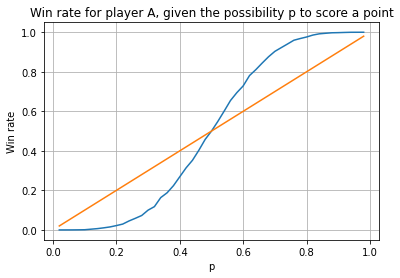

In [8]:
import matplotlib.pyplot as plt  # library for plotting. We will call it plt in our code

# to plot the results in the notebook:
%matplotlib inline

# Let's plot (x,y)
plt.figure()
plt.plot(x, y)
plt.plot(x,x)
# Specify some extra attributes
plt.xlabel('p')
plt.ylabel('Win rate')
plt.title('Win rate for player A, given the possibility p to score a point')
plt.grid(True)


Η πορτοκαλί γραμμή είναι η y=x. Παρατηρούμε πως η μπλε γραμμή είναι συμμετρική ως προς το σημείο τομής της με την y=x. Όπως ήταν αναμενόμενο για p<0.5 είναι μικρή η πιθανότητα να κερδίσει το παιχνίδι ο Α, ενώ για p>0.5 έχει μεγαλύτερη πιθανότητα. Η πιθανότητα αυξάνεται εκεθετικά στην αρχή, και στην συνέχεια αλλάζει η κυρτότητα με αποτέλεσμα να κινείται ασυμπτωματικά ως προς την y=1.

## Παραδοτέο 2


In [9]:
from simple_markov_chain_lib import markov_chain  # import markov chain simulator

# Transition Table
markov_table = {
    0: {0: 2/5, 1: 1/2, 2: 1/10},  # from state 0 we move to state 1 with prob 0.5 and to state 2 with 0.5
    1: {0: 1/3, 3: 2/3},
    2: {2: 1.},
    3: {0: .5, 1: 1/8, 3: 1/4, 4: 1/8},
    4: {4: 1.}
}

# Initial Distribution
init_dist = {0: 1.}  # we start from state 0 with probability 1

mc = markov_chain(markov_table, init_dist)

In [10]:
import statistics as stat

M = 30
y = []

for k in range(5,13):
    res = []
    sample_size = 2**k
    for j in range(M):
        running_total = 0
        for i in range(sample_size):
            mc.start()
            while mc.running_state != 2 and mc.running_state != 4:
                mc.move()
            running_total += mc.steps  # steps it took to be absorbed

        mc_estimate = running_total / sample_size
        res.append(mc_estimate)
    y.append(stat.variance(res))
            

<Figure size 432x288 with 0 Axes>

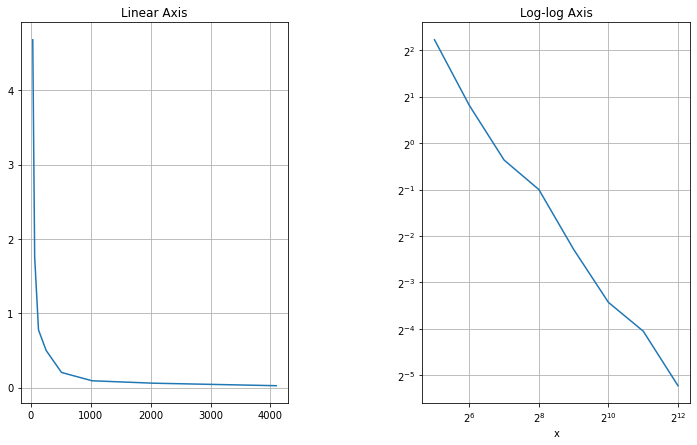

<Figure size 432x288 with 0 Axes>

In [18]:
import numpy as np  # numerical computations library. We will call it np in our code

# Create a list of real numbers from start to end by step
start, end, step = 0.02, 1.00, 0.02
x = [2**i for i in range(5,13)]

import matplotlib.pyplot as plt  # library for plotting. We will call it plt in our code

# to plot the results in the notebook:
%matplotlib inline

plt.figure(figsize=(12, 7))  # define figure size

# Right Axes
plt.subplot(1, 2, 1)  # setup subplots 1-row, 2-cols, select the 1st
plt.plot(x, y)
plt.title('Linear Axis')
plt.grid(True)  # add grid-lines

# Left Axes
plt.subplot(1, 2, 2) # select the 2nd subplot
plt.loglog(x, y, base=2)
plt.xlabel('x')
plt.title('Log-log Axis')
plt.grid(True)

plt.subplots_adjust(wspace = 0.5)  # specify the width space
plt.figure()


In [19]:
newx = np.log2(x)
newy = np.log2(y)

np.polyfit(newx,newy,deg=1)

array([-1.03507117,  7.13394156])

Όπως ήταν θεωρητικά αναμενόμενο η διασπορά φθίνει εκθετικά καθώς αυξάνουμε το μέγεθος του δείγματος. Επομένως όπως περιμενάμε, σε λογαριθμική κλίμακα βλέπουμε μια φθίνουσα ευθεία. 

Επομένως θα παρεμβάλλουμε στα δεδομένα (σε λογαριθμική κλίμακα) ένα πολυώνυμο πρώτου βαθμού, δηλαδή ευθεία της μορφής $ y=ax+b $, όπου βρήκαμε την κλίση $ a = -1.035 $